In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models  import load_model
import numpy as np
import streamlit as st
from PIL import Image

In [3]:
data_dir = r"C:\Users\SATYA\machine_Learning\archive\TomatoOnly"

In [17]:
img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 124,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 124,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 16011 files belonging to 10 classes.
Using 12809 files for training.
Found 16011 files belonging to 10 classes.
Using 3202 files for validation.


In [18]:
print("Train batches:", len(train_ds))
print("Validation batches:", len(val_ds))

Train batches: 401
Validation batches: 101


In [19]:
class_name = train_ds.class_names
print(len(class_name))
print(class_name)

10
['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


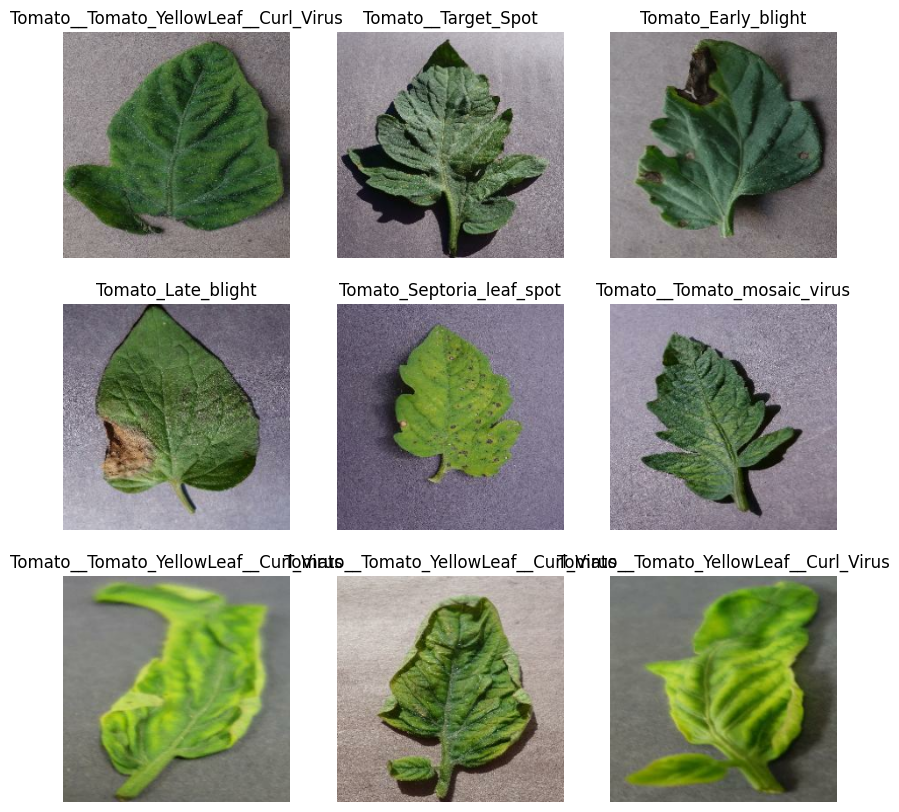

In [20]:
for images, labels in train_ds.take(1): 
    plt.figure(figsize=(10, 10)) 
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)  
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(class_name[labels[i]]) 
        plt.axis("off") 
    plt.show()


In [21]:
for images, labels in train_ds.take(1):
    print(labels[:10])
    print(images.shape)

tf.Tensor([4 2 0 9 7 4 2 0 9 6], shape=(10,), dtype=int32)
(32, 224, 224, 3)


In [22]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [23]:
normalised_layer = tf.keras.layers.Rescaling(1./255)

In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [30]:
model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape = (img_height, img_width,3)),

    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),

    layers.Dense(len(class_name), activation = 'softmax')
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10,
    verbose = 1,
    batch_size = batch_size
)

Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 484s 1s/step - accuracy: 0.4476 - loss: 1.6058 - val_accuracy: 0.7367 - val_loss: 0.7418
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1112s 3s/step - accuracy: 0.7738 - loss: 0.6619 - val_accuracy: 0.8676 - val_loss: 0.3830
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1223s 3s/step - accuracy: 0.8280 - loss: 0.4984 - val_accuracy: 0.8161 - val_loss: 0.6108
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - accuracy: 0.8526 - loss: 0.4457 - val_accuracy: 0.8151 - val_loss: 0.5387
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 486s 1s/step - accuracy: 0.8672 - loss: 0.3776 - val_accuracy: 0.8913 - val_loss: 0.3270
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 467s 1s/step - accuracy: 0.8857 - loss: 0.3346 - val_accuracy: 0.8848 - val_loss: 0.3206
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 491s 1s/step - accuracy: 0.8950 - loss: 0.2999 - val_accuracy: 0.8423 - val_loss: 0.5275
Epoch 8/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.9069 - loss: 0.2697 - val_ac

In [32]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

101/101 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.8288 - loss: 0.5786
Validation Accuracy: 82.51%


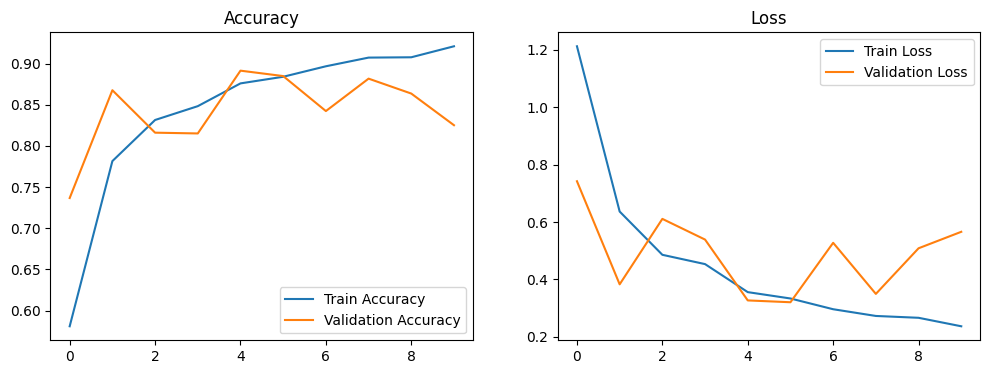

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [39]:
for images, labels in val_ds.take(1): 
    sample_image = images[8] 
    sample_label = labels[8] 
    break


In [40]:
input_image = tf.expand_dims(sample_image, axis=0) 

In [41]:
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions, axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


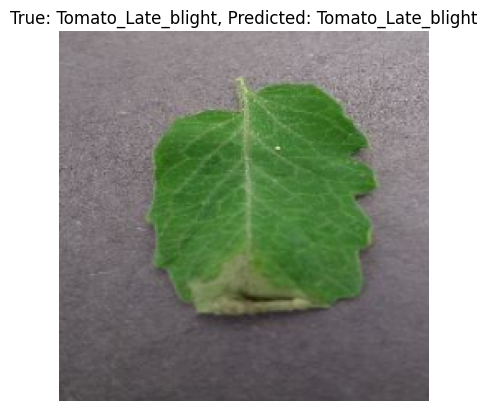

In [42]:
plt.imshow(sample_image.numpy().astype("uint8"))
plt.title(f"True: {class_name[sample_label]}, Predicted: {class_name[predicted_class]}")
plt.axis("off")
plt.show()

In [43]:
model.save("tomato_model.keras")

In [44]:
model = load_model("tomato_model.keras")